# Welcome to Simple guide Kernel

I am quite a newcomer to the Kaggle scene as well and the first proper kaggle script.The Titanic dataset is a prime candidate for introducing the concept of Machine learning as many newcomers like me to Kaggle start out here. 
The objective of this notebook is to follow a step-by-step workflow, explaining each step.

I hope that anyone, regardless of their python skills can find something useful and helpful.
please feel free to leave me any comments with regards to how I can improve.

<h2 style="color:blue"><center> Don't forget to upvote if you like it! It's free!! 

## Table of content:

* About RMS Titanic
* All about Data
* Import Necessary Libraries
* Load the data
* Data analysis
* Handle Missing Values
* Data Exploration/ Visualizing
* Correlation & Matrix
* Feature Engineering
* Predictive Modeling
> 1. Logistic Regression
> 2. KNN Classifier
> 3. Gaussian Naive Bayes
> 4. Support Vector Machine(SVM)
> 5. Random Forest
> 6. Decision Tree
* Confusion Matrix

### About RMS Titanic

The reason the titanic is often referred to as 'RMS Titanic' is because of Royal Mail Ship.
The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. 

We will go through the whole process of creating a machine learning model on the famous Titanic dataset, which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival. In this challenge, we will predict whether a passenger on the titanic would have been survived or not.

<img src="https://i.ibb.co/WFKW312/titanic-conspiracy-rms-olympic-gettyimages-1055101284.jpg" alt="titanic" style="width:700px;height:400px;">

## All about Data 


<span style='font-family:Georgia'>
    <table>
        <tr>
            <th>Variable</th>
            <th>Key</th>
            <th>Definition</th>
        </tr>
        <tr>
            <td>survival</td>
            <td>0 = No, 1 = Yes</td>
            <td>Whether person survived or not</td>
        </tr>
        <tr>
            <td>pclass</td>
            <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
            <td>1st = Upper,2nd = Middle,3rd = Lower</td>
        </tr>
        <tr>
            <td>sex</td>
            <td>male,female</td>
            <td>sex of the passenger</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Continuous varivale</td>
            <td>Age in years</td>
        </tr>
        <tr>
            <td>sibsp</td>
            <td>numeric values</td>
            <td># siblings / spouses aboard the Titanic<br>Sibling = brother, sister, stepbrother, stepsister<br>Spouse = husband, wife</td>
        </tr>
        <tr>
            <td>parch</td>
            <td>numeric values</td>
            <td># parents / children aboard the Titanic<br> Parent = mother, father <br> Child = daughter, son, stepdaughter, stepson <br>Some children travelled only with a nanny, therefore parch=0 for them</td>
        </tr>
        <tr>
            <td>ticket</td>
            <td>numeric values</td>
            <td>Ticket number</td>
        </tr>
        <tr>
            <td>fare</td>
            <td>numeric values</td>
            <td>Passenger fare</td>
        </tr>
        <tr>
            <td>cabin</td>
            <td>numeric values</td>
            <td>Cabin number</td>
        </tr>
        <tr>
            <td>embarked</td>
            <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
            <td>Port of Embarkment</td>
        </tr>
    </table>  
</span>
    

## Import  Necessary Libraries

In [6]:
# Pandas library in python to read the csv file.
import pandas as pd

# for numerical computaions use numpy library
import numpy as np

# data visualization

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
 
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

##  Load the Data

In [7]:
# Create a pandas dataframe and assign it to variable.
titanic = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

## Data Analysis

In [8]:
# Print first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Print Last 5 rows of the dataframe.
titanic_test.tail() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


There is no Survived column here which is our target varible we are trying to predict.



In [10]:
# gives shape of datase in (rows,columns)
titanic.shape

(891, 12)

In [11]:
# Describe gives us statistical information about numerical columns in the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we can check from count if there are missing values in columns, here 'age' has missing values.

Also we can see that 38% out of the training-set survived in Titanic.

We can also see that the passenger's age range from 0.4 to 80.

In [12]:
# unique values or range for feature set
print('Genders:', titanic['Sex'].unique())
print('Embarked:', titanic['Embarked'].unique())
print('Pclass:', titanic['Pclass'].unique())
print('Survived:', titanic['Survived'].unique())
print('SibSp Range:', titanic['SibSp'].min(),'-',titanic['SibSp'].max())
print('Parch Range:', titanic['Parch'].min(),'-',titanic['Parch'].max())
print('Family size range:', (titanic['Parch']+titanic['SibSp']).min(),'-',(titanic['Parch']+titanic['SibSp']).max())
print('Fare Range:', titanic['Fare'].min(),'-',titanic['Fare'].max())

Genders: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]
Survived: [0 1]
SibSp Range: 0 - 8
Parch Range: 0 - 6
Family size range: 0 - 10
Fare Range: 0.0 - 512.3292


In [13]:
# info method provides information about dataset like 
# total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 Also Embarked and cabin has missing values.
 
 ##  Missing Values 
 
 First we will visulize missing values.In which column missing values are present?

We can see that Age, Embarked and cabin has missing values. now, lets check missing values for test data.

cabin, age and fare has missing values in test data.

In [16]:
# Let's write a function to print the total percentage of the missing values.
# (This can be a good excercise for beginers to try to write sample function like this)

# This function takes a Dataframe (df) as input and returns two columns,total missing values and total missing alues percentage
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) * 100 /len(df),2)
    return pd.concat([total,percent], axis = 1 ,keys = ['total','percent'])

In [17]:
missing_data(titanic)

,total,percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


now, lets check missing values for test data.

In [18]:
# check missing values in test dataset
missing_data(titanic_test)

,total,percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


 we will see how to deal with these missing valus next.

In [19]:
# COMPLETING: complete or delete missing values in train and test dataset
dataset = [titanic,titanic_test]

for data in dataset:
    # coplete missing age with median
    data['Age'].fillna(data['Age'].median(),inplace = True)
    
    # complete Embarked with mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    
    # complete missing Fare with median
    data['Fare'].fillna(data['Fare'].median(),inplace = True)

In [20]:
missing_data(titanic)

,total,percent
Cabin,687,77.1
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


### Note: Column "Cabin" has more than 75% of missing values in both train and test dataset.
#### Suggestion: Not to impute missing data in columns, which have more than 40% of missing data.

In [21]:
titanic.drop(['Cabin'], axis=1, inplace = True)
titanic_test.drop(['Cabin'],axis=1,inplace=True)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [24]:
missing_data(titanic)

,total,percent
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


Here, 549 Travellers died in tragedy and 342 Travellers save their lives. About 38% of people alive in tragedy.

### 2. Gender Analysis

Lets Check how many male and female survived on titanic.

In [27]:
age_analysis=titanic[titanic['Survived']==1]['Sex'].value_counts().reset_index().rename(columns={'index':'Sex','Sex':'count'})

Out of 342 survived travellers there are 233 female and 109 male.We can see that survival chance of female is more than  male.but for surety check total number of male and female. 

In [29]:
def draw(graph):
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 5,height ,ha= "center")

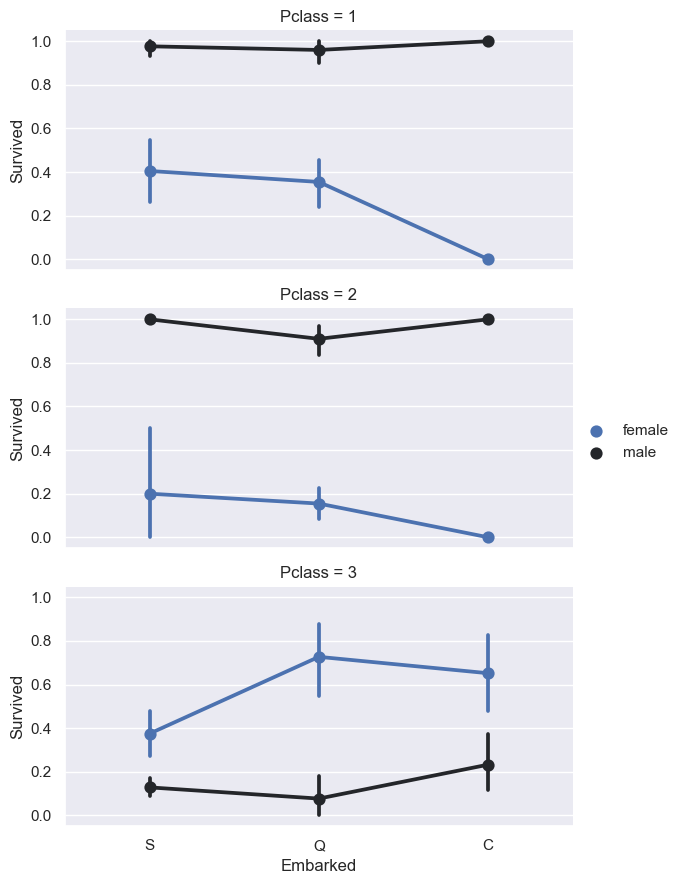

In [32]:
FGrid = sns.FacetGrid(titanic, row='Pclass', aspect=2)
FGrid.map(sns.pointplot, 'Embarked', 'Survived', 'Sex', palette=None,  order=None, hue_order=None)
FGrid.add_legend()

On port S and C has more survival chances. Also we can see women have a high survival probability.

Based on this senario Embarked looks to be correlated with survival, depending on the Pclass.
More chances of surviaval if travellers are In Pclass 1.

From which location passenger start journey does it matter or its more important that passenger is on Titanic, no matter from where you start journey. 

as we know that **At 2:20 a.m. on April 15, 1912, the British ocean liner Titanic sinks into the North Atlantic Ocean.**
Its night time, high cold weather **(The temperature of the water was -2.2 degrees Celsius when Titanic was sinking)**, and Job-Location/Rest-room(Passenger class) allocated to everyone on Titanic.

We can use Embarked as feature here for getting high accuracy but logically its doesn't matter. so we drop it out.

As a part of data science you have to think 360 degree angle, some features are important but logically its not, so thats why you must have domain knowledge for feature selection.

In [33]:
titanic.drop(['Embarked'], axis=1, inplace = True)
titanic_test.drop(['Embarked'],axis=1,inplace=True)

### 4. Age Analysis

In [34]:
titanic=titanic.dropna()
titanic['age_category']=np.where((titanic['Age']<19),"below 19",
                                 np.where((titanic['Age']>18)&(titanic['Age']<=30),"19-30",
                                    np.where((titanic['Age']>30)&(titanic['Age']<=50),"31-50",
                                                np.where(titanic['Age']>50,"Above 50","NULL"))))
age=titanic['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'Count'})

In [35]:
titanic_age=titanic['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'count'})

**Lets clear our vision by another graph.**

In [37]:
titanic['survived_or_not']=np.where(titanic['Survived']==1,"Survived",np.where(titanic['Survived']==0,"Died","null")) # .head(2)'

sun_df=titanic[['Sex','survived_or_not','age_category','Fare']].groupby(['Sex','survived_or_not','age_category']).agg('sum').reset_index()

#### How are the Age spread for travellers?

In [39]:
sur_age=titanic[titanic['Survived']==1]['Age']
un_age=titanic[titanic['Survived']==0]['Age']

In [40]:
fig = go.Figure(go.Box(y=sur_age,name="Age")) 
fig.update_layout(title="Distribution of Age by Survived travellers", autosize=False, width=600, height=700)
fig.show()

NameError: name 'go' is not defined

We plot this graph to check outliers of age column.

Here, we can see that average age of survived person near to 30.

and maximum survived passenger's age range lies between 22 to 35 years.

#### what is Outlier?
Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

<img src="https://i.ibb.co/HNjCZ4s/images-mod1-spread11.gif" alt="outlier" width="500" height="350">
<ul>

In our plot there are blue points above upper fence,those are all ouliers.
Means our age range is 0.42 to 56 and rare age is above 56.Those are 58,60,62,63 and 80.

This plot show us value of min, max, median and quartile ranges. 

##### Lets do same way  check this for unsurvived passengers.

### 4. Passanger Class(Pclass) analysis 

we will check whether Upper class or lower class affect survival rate.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

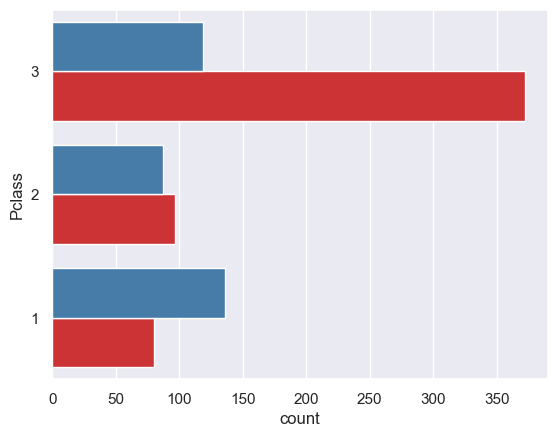

In [43]:
ax = sns.countplot(y="Pclass", hue="Survived", data=titanic, palette="Set1")
for p in ax.patches:
        Total = '{:,.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(Total, (x, y))

Here we see that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

### 5. SibSp and Parch Analysis

SibSp and Parch would make more sense, Parents not let child die, Bond of Blood relation always help each other first, rather than helping others they think about them self and them family member.

Create new feature Family Size as a combination of SibSp and Parch

In [44]:
# combine test and train as single to apply some function, we will use it again in Data Preprocessing
all_data=[titanic,titanic_test]

for dataset in all_data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

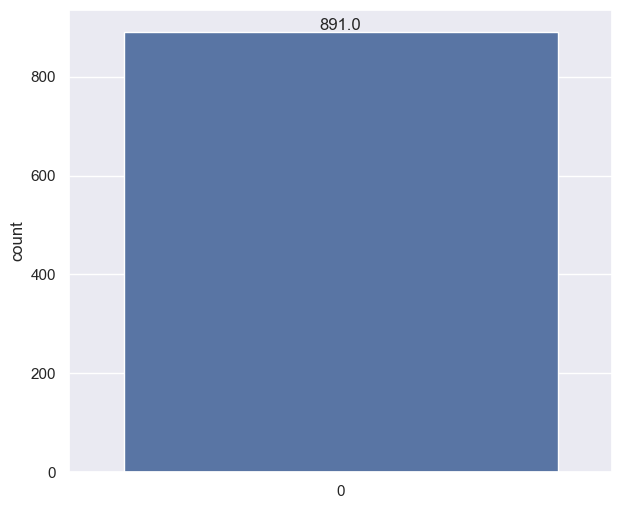

In [45]:
sns.set(style="darkgrid")
plt.figure(figsize = (7, 6))
x = sns.countplot(titanic['Family'])
draw(x)

In [46]:
surfamily_size = titanic[titanic['Survived'] == 1]

we can see  that single person have a high survival probability.

From plot we can say  smaller family higher survival rate.

**same way we can check for unsurvied travellers family size.**

In [48]:
unfamily_size = titanic[titanic['Survived'] == 0]

**Now we will see whether Age is considerable with family size for higher probability of survival?**

As per above plot we can say that if you are traveling alone or family of 2 members and your age is around 30 than your survival chance is almost 50%. While you have family of 5 members and all are around 30 then your survival chance very high.

Also we can see that survival chance is next to zero if your family members more than 7.

So family & age features are very important.

In [51]:
# create bin for age features. 
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

C:\Users\mazen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\mazen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

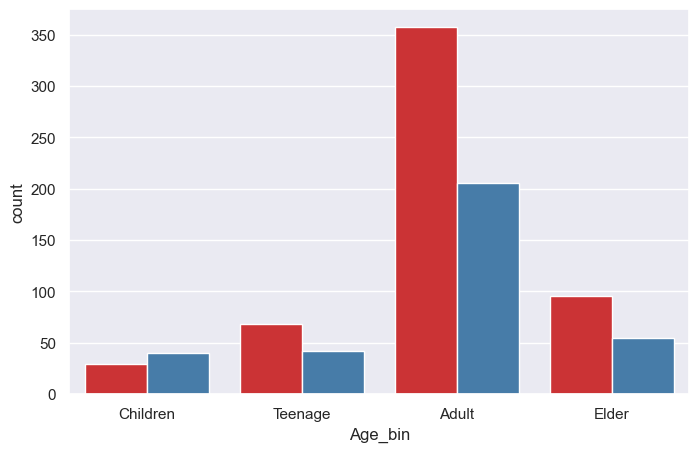

In [52]:
plt.figure(figsize = (8, 5))
bin = sns.countplot(x='Age_bin', hue='Survived', data=titanic,palette="Set1")
draw(bin)

Here, Survived count is higher for Adult.
for children and teenage is almost eual chance of survival.

### 6. Fare Analysis

we are going to create bins for different fare price level.

In [53]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,10,50,100,550], labels=['Low_fare','medium_fare','Average_fare','high_fare'])

Some insight in Fare information

* A higher family size doesn't necessarily indicate higher Fare.

* Passengers in class 2 and 3 paid a fare of under 100 bucks.

* Most passengers paid under 50 bucks of fare.

It seems that passenger fare depends on their travel class in our model.lets prove with prove.

<Axes: xlabel='Pclass', ylabel='count'>

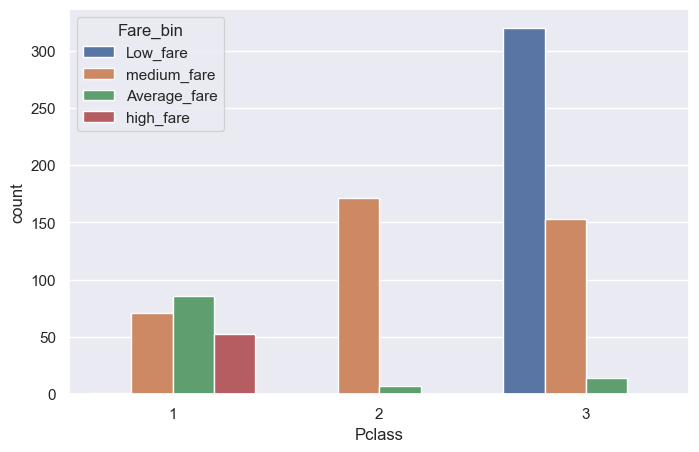

In [54]:
plt.figure(figsize = (8, 5))
sns.countplot(x='Pclass', hue='Fare_bin', data=titanic)

We can say Low fare is only in 3rd Pclass.Medium fare travellers are in all class.High fare travellers are only in 1st class.

Pclass and Fare correlated with other.So we can drop one of them.

But if we think logically how much price I paid for ticket is not correlate to my survival chance.

So,basically we should drop fare.For surety we will create correlation matrix first.

## Correlation

### What is correaltion?

 correlation is a measure of how strongly one variable depends on another.
 
 **1.Positive correlation:**

A positive correlation is a relationship between two variables in which both variables move in the same direction.
Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.see it with example of age vs salary.

<img src="https://i.ibb.co/pKnm57p/age-vs-salary.png" alt="positive correlation" width="450" height="300" data-load="full" style="">

**2.Negative correlation**

A negaitive correlation is a relationship between two variables in which both variables move in the opposite direction.
Therefore, when one variable increases as the other variable decreases, or one variable decreases while the other increases.

<img src="https://i.ibb.co/Jv85tfs/scatter-plot-negative-correlation.png" alt="negative correlation" width="400" height="300" data-load="full" style="">

**Note:** only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. 

## Feature Engineering

Feature engineering is the art of converting raw data into useful features.To help us get a better performance, we can create new features based on the original features of our dataset.

we will see first which are not numeric data and than after convert them into numeric data.

In [57]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  age_category     891 non-null    object  
 11  survived_or_not  891 non-null    object  
 12  Family           891 non-null    int64   
 13  Age_bin          891 non-null    category
 14  Fare_bin         876 non-null    category
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.8+ KB


We already have Survived column so we drop the colom with name "survived_or_not" 

In [58]:
drop_col= ["survived_or_not","age_category"]
titanic.drop(drop_col,axis=1,inplace=True)

In [59]:
# Convert ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}

for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(genders)
titanic['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [60]:
for dataset in all_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 26), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 35), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 6
titanic['Age'].value_counts()

Age
3    222
2    139
4    133
5    116
6    101
1     97
0     83
Name: count, dtype: int64

As we created new fetures form existing one, so we remove that one.

Dropping SibSp & Parch because we have family now. same way Age.
We also going to remove some other features like passenger id in list, Ticket number and Name.

In [61]:
for dataset in all_data:
    drop_column = ['Age_bin','Fare','Name','Ticket', 'PassengerId','SibSp','Parch','Fare_bin']
    dataset.drop(drop_column, axis=1, inplace = True)

## Predictive Modeling

After all the preprocessing, we are now ready for building and evaluating different Machine Learning models.

We have seen some insights from the data analysis. But with that, we cannot accurately predict whether a passenger will survive or die. So now we will predict whether a Passenger will survive or not using some great Classification Algorithms.

In [62]:
all_features = titanic.drop("Survived",axis=1)
Targete = titanic["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targete,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 4), (268, 4), (623,), (268,))

In [63]:
titanic.head()

,Survived,Pclass,Sex,Age,Family
0,0,3,0,2,2
1,1,1,1,5,2
2,1,3,1,2,1
3,1,1,1,4,2
4,0,3,0,4,1


In [77]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targete,cv=10,scoring='accuracy')

print('The accuracy of the Random Forest Classifier is',acc_random_forest)
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))

The accuracy of the Random Forest Classifier is 85.87
The cross validated score for Random Forest Classifier is: 79.57


In [81]:
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
c_mat = confusion_matrix(y_train, predictions)
print(c_mat)

[[331  50]
 [ 78 164]]


<Axes: >

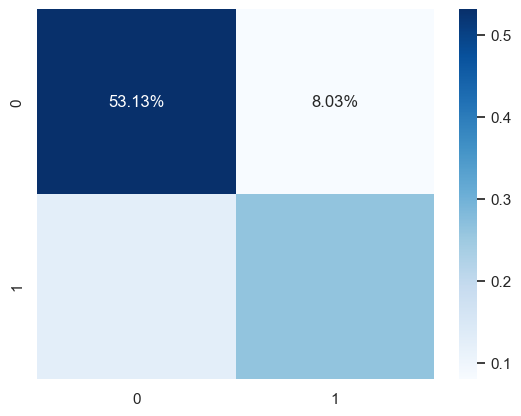

In [82]:
# we will see our confusion matrix in percentage.
sns.heatmap(c_mat/np.sum(c_mat), annot=True, 
            fmt='.2%', cmap='Blues')

### Precision and Recall:

precision refers to the percentage of results which are relevant, recall refers to the percentage of total relevant results correctly classified by our algorithm.

In [83]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7663551401869159
Recall: 0.6776859504132231


### F-Score

The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [84]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.719298245614035